In [1]:
import sys

sys.path.append('..')

In [2]:
import json
import numpy as np
import pandas as pd
from pathlib import Path

from Utils.utils import Fourier
from Utils.plot_utils import BarRenderer

In [3]:
data_folder = Path('..', '..').resolve() / Path('data', 'MFP_4_to_6')
data_file = data_folder / Path('MFP(softmax).csv')
print(data_file)
df = pd.read_csv(data_file)
df.head()

C:\Users\andra\Documents\grupcogelfarol\data\MFP_4_to_6\MFP(softmax).csv


,Unnamed: 0,id_sim,round,attendance,id_player,decision,score,model,threshold,num_agents
0,0,e266fae0-7039-11ef-9e09-d48892cc6522,0,"[1, 1, 0, 0]",0,1,1,NaN,0.5,4
1,1,e266fae0-7039-11ef-9e09-d48892cc6522,0,"[1, 1, 0, 0]",1,1,1,NaN,0.5,4
2,2,e266fae0-7039-11ef-9e09-d48892cc6522,0,"[1, 1, 0, 0]",2,0,0,NaN,0.5,4
3,3,e266fae0-7039-11ef-9e09-d48892cc6522,0,"[1, 1, 0, 0]",3,0,0,NaN,0.5,4
4,4,e266fae0-7039-11ef-9e09-d48892cc6522,1,"[1, 0, 0, 1]",0,1,1,NaN,0.5,4


C:\Users\andra\AppData\Local\Temp\ipykernel_28364\2638602689.py:7: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, grp in data.groupby(columns):
c:\Users\andra\Documents\grupcogelfarol\src\Experiments\..\Utils\plot_utils.py:1535: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(figsize=(0.5*num_rounds,0.5*self.num_players))


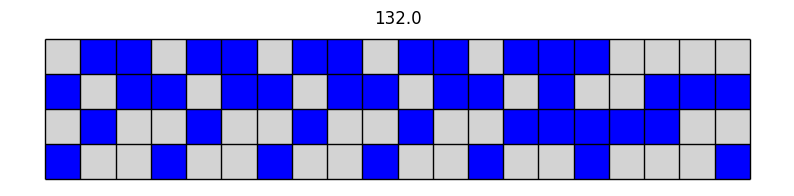

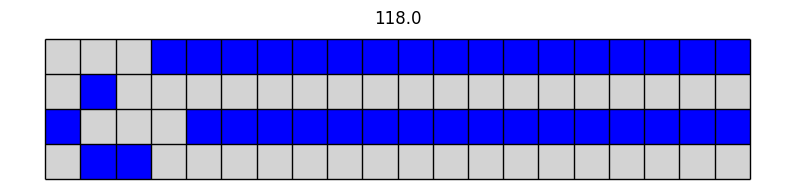

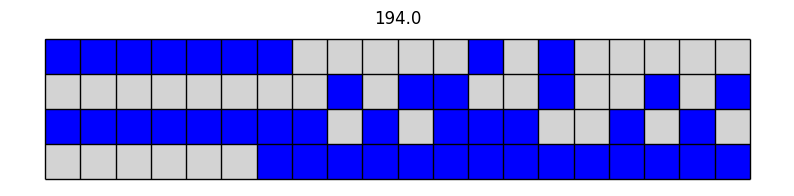

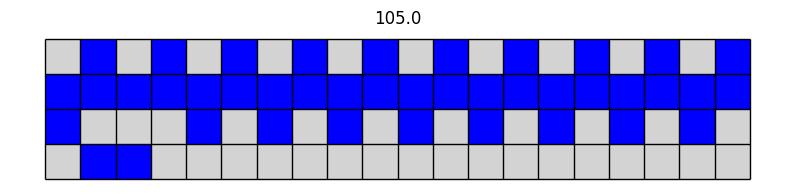

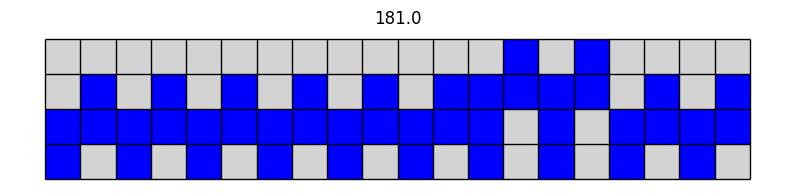

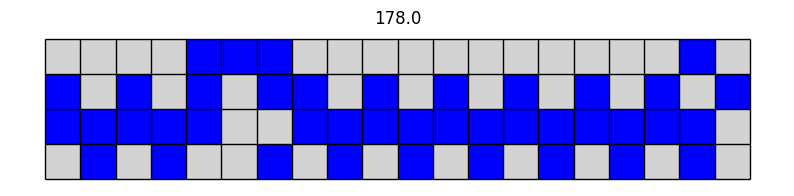

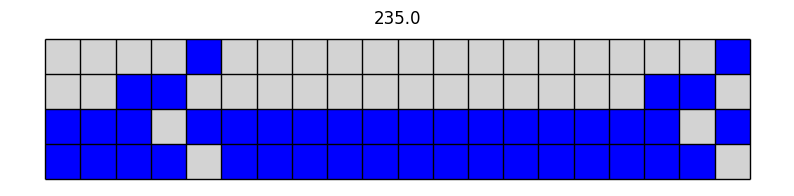

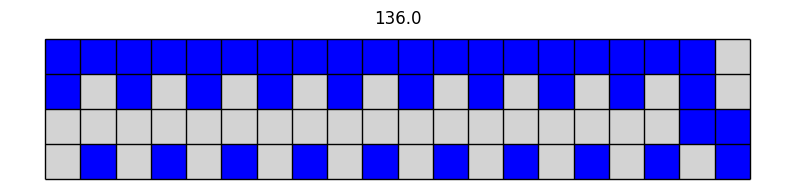

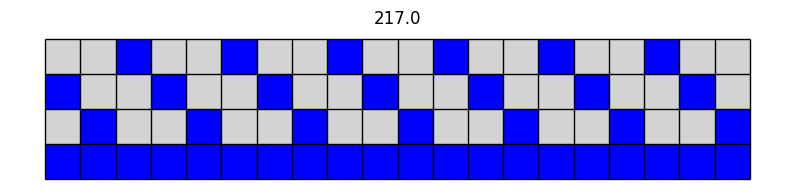

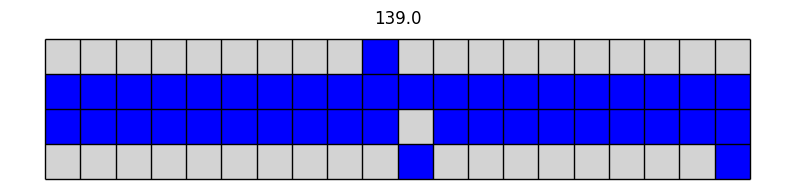

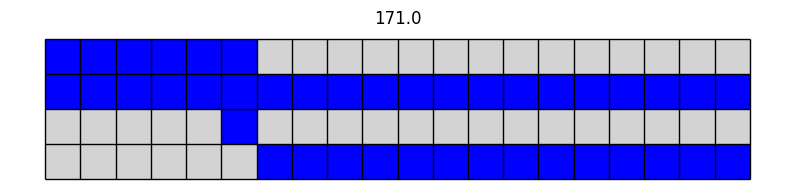

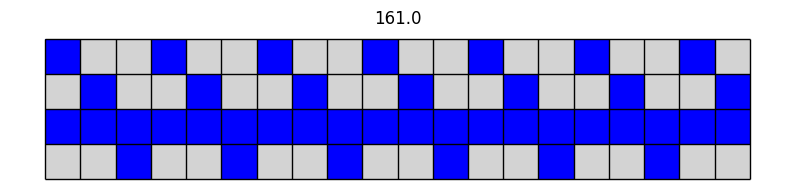

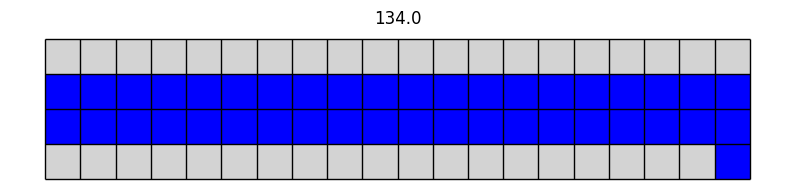

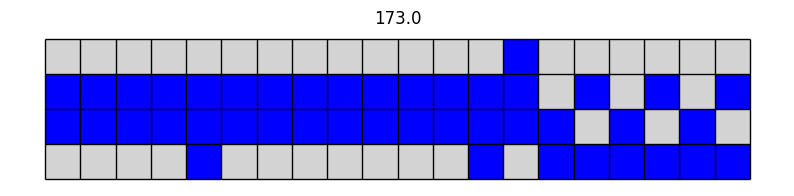

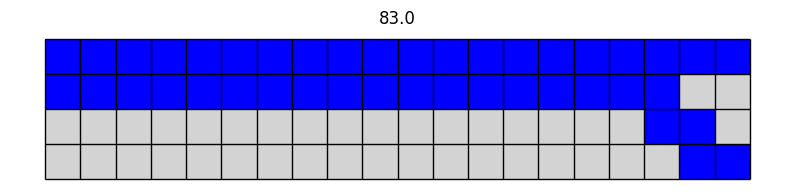

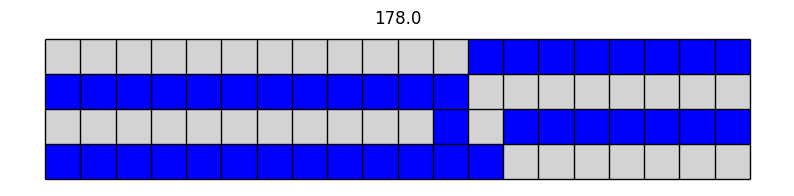

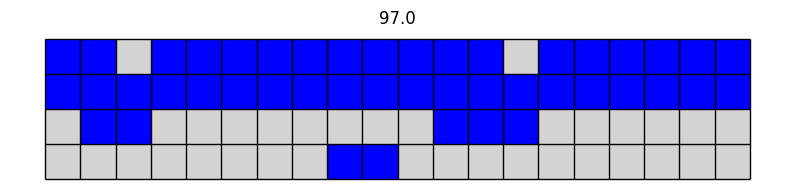

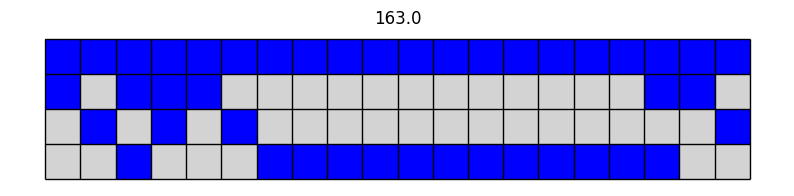

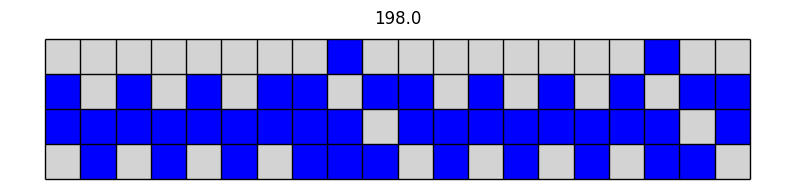

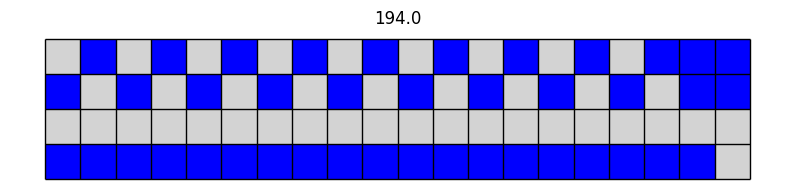

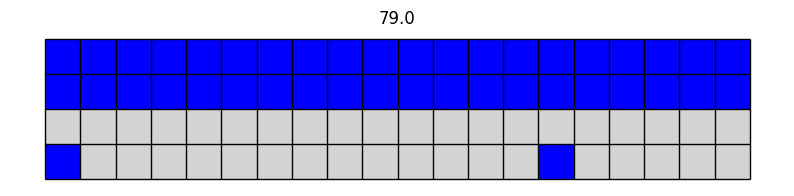

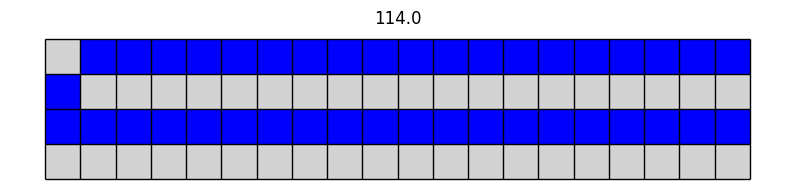

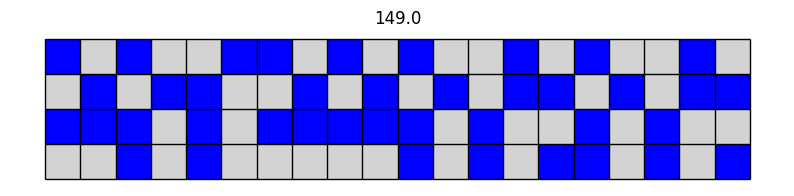

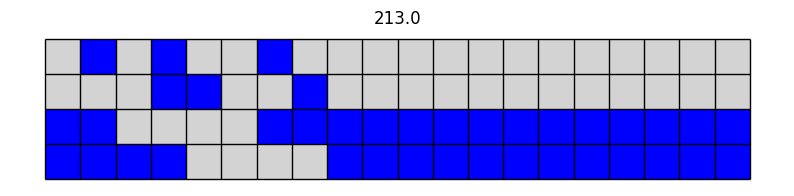

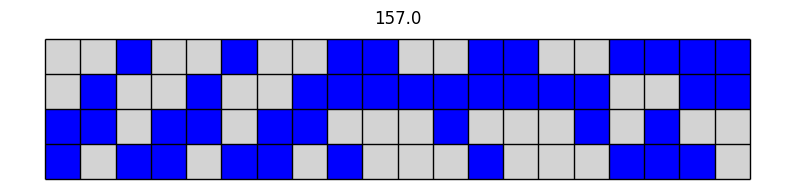

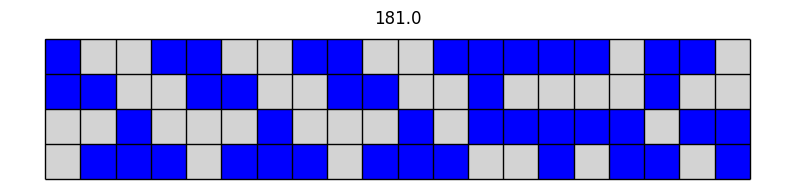

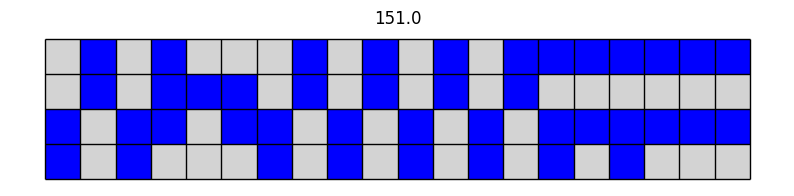

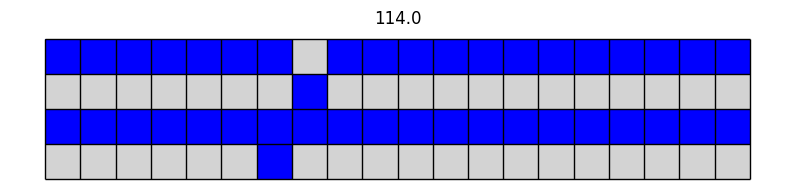

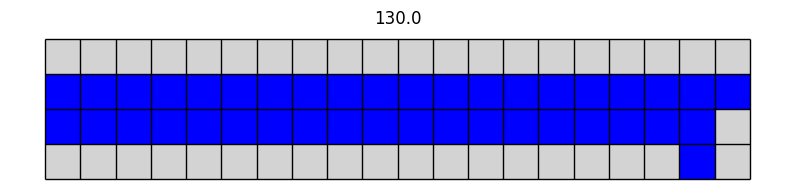

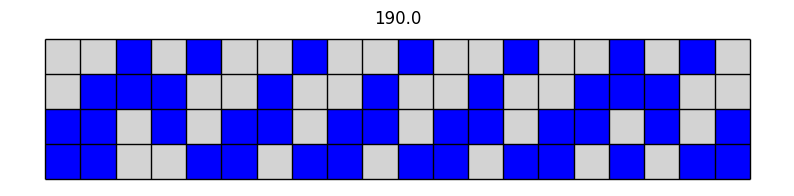

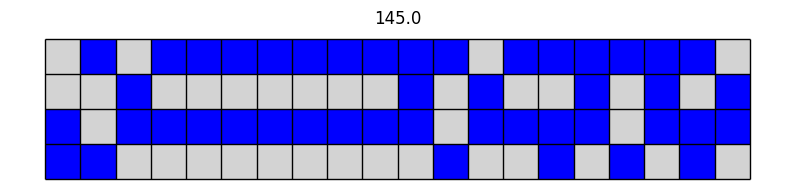

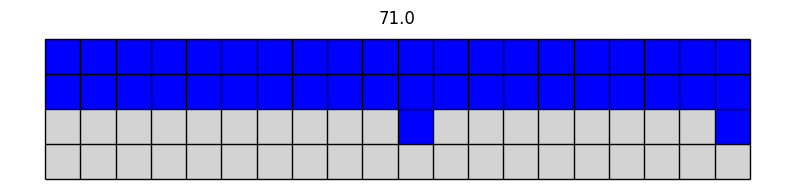

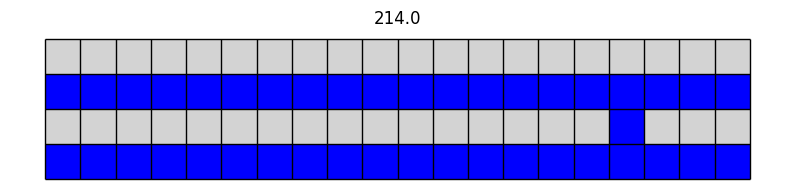

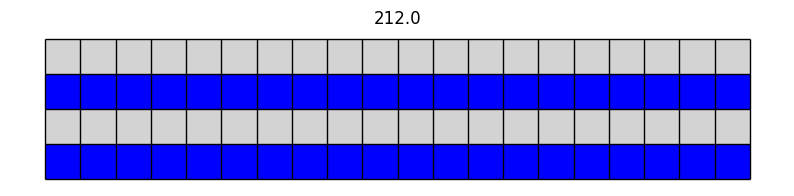

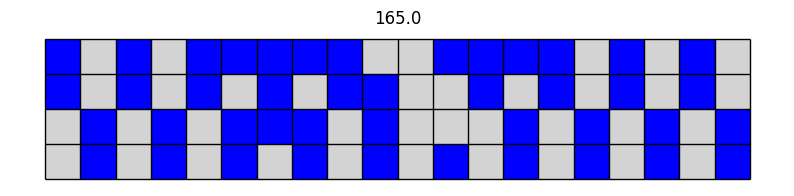

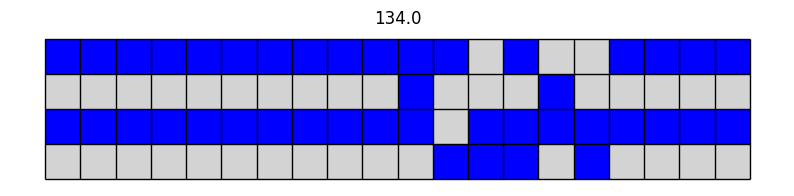

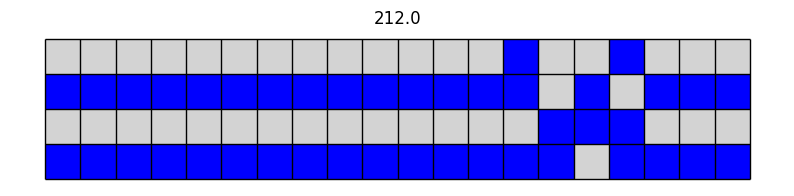

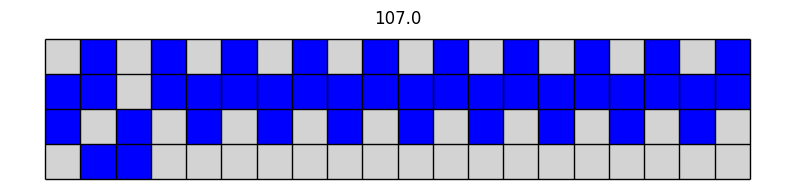

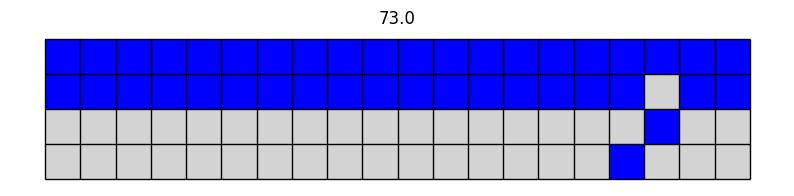

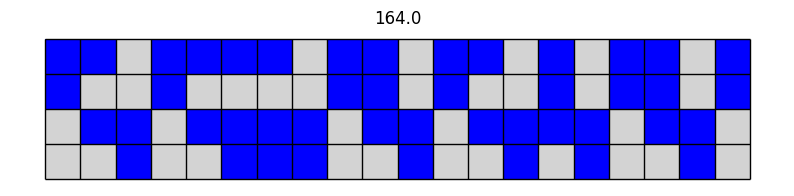

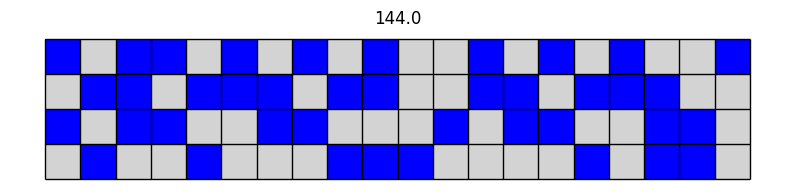

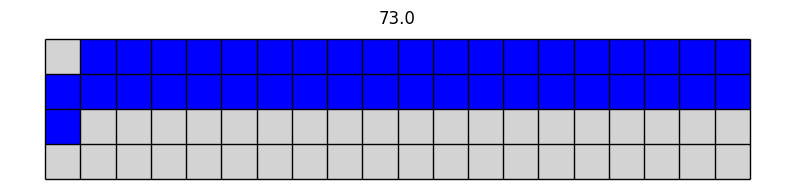

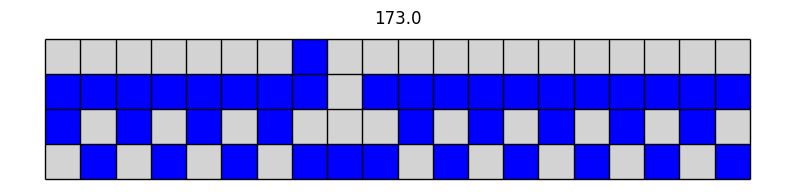

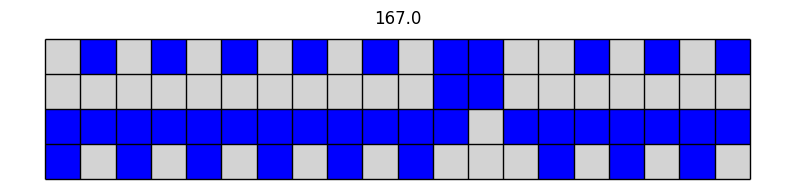

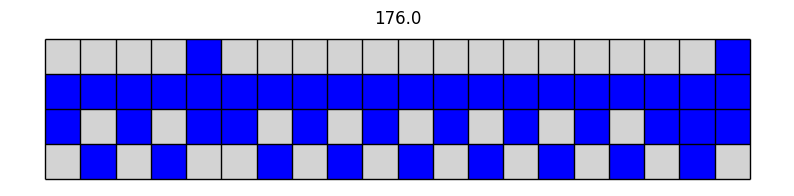

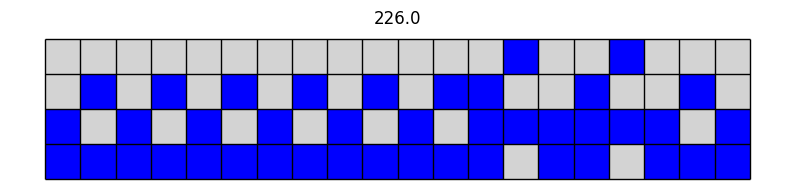

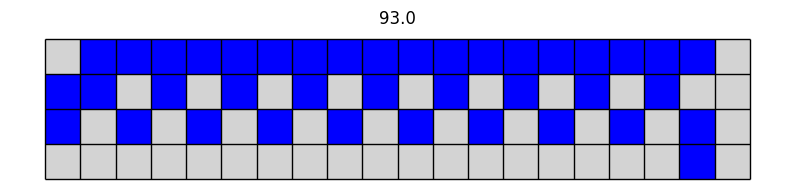

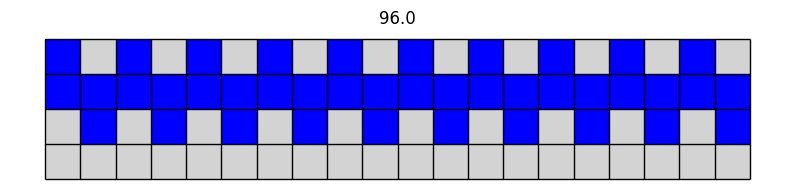

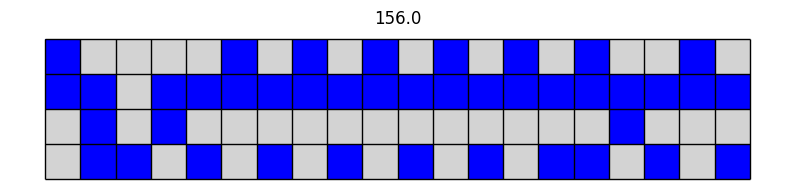

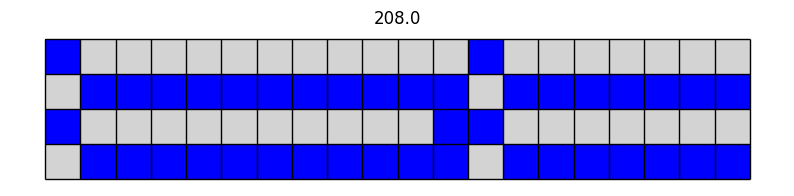

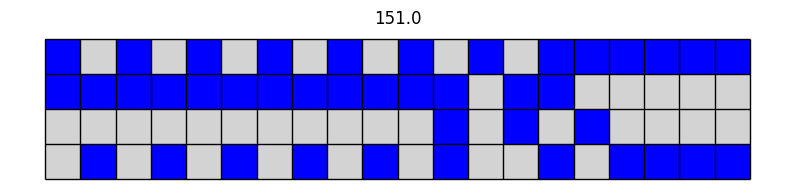

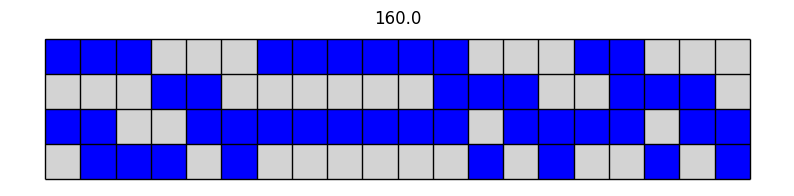

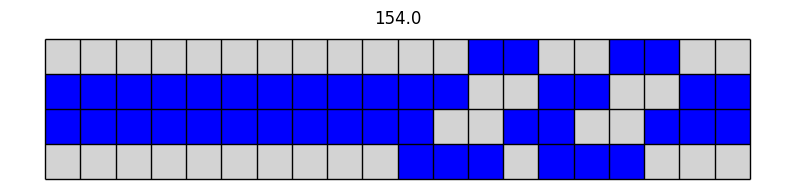

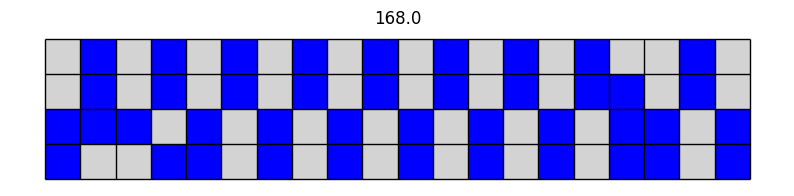

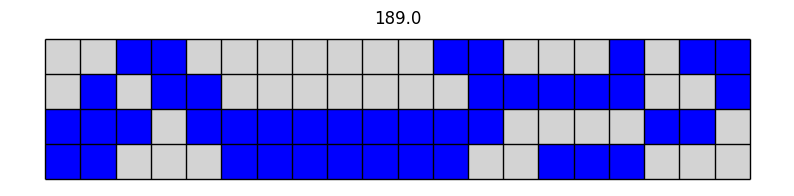

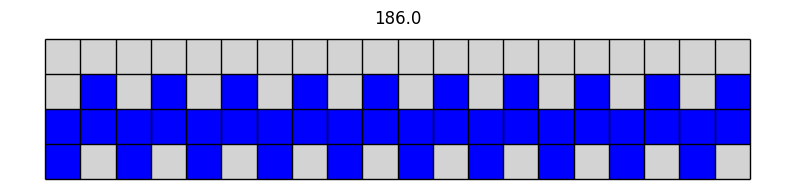

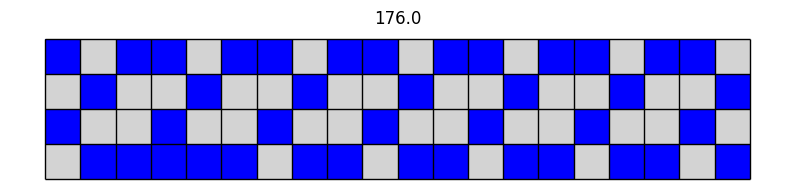

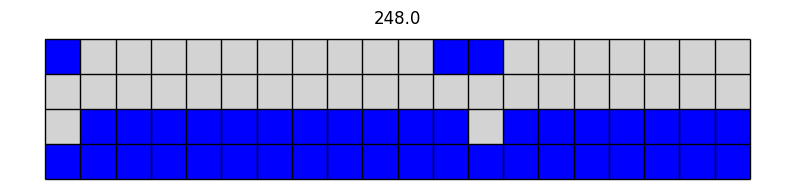

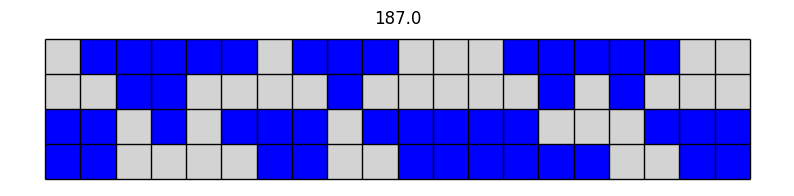

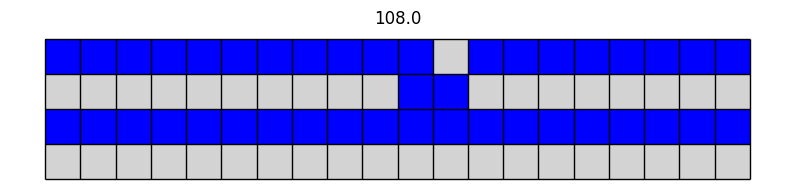

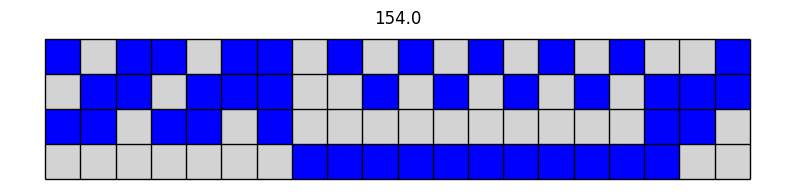

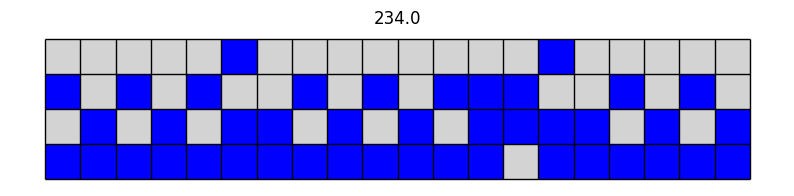

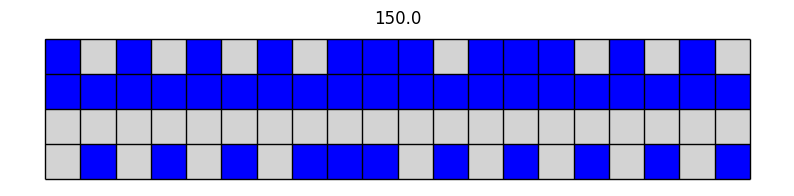

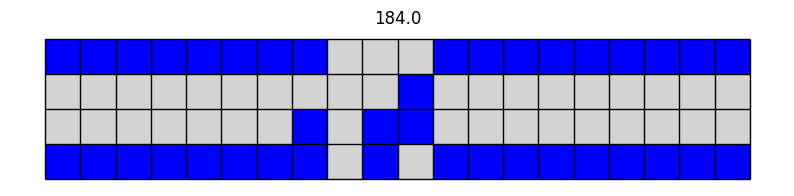

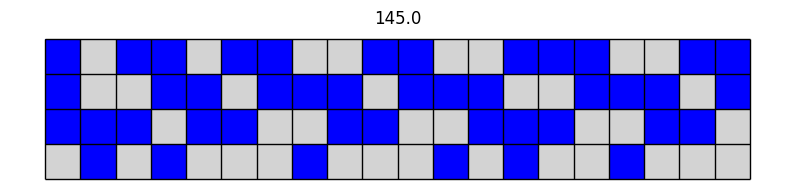

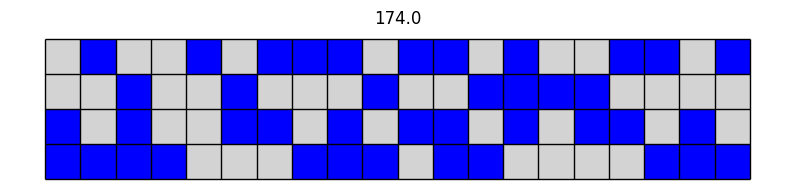

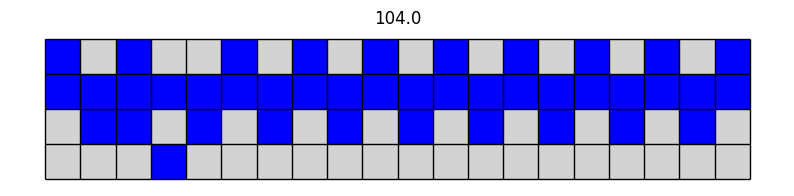

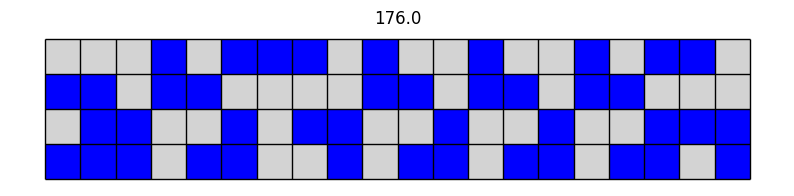

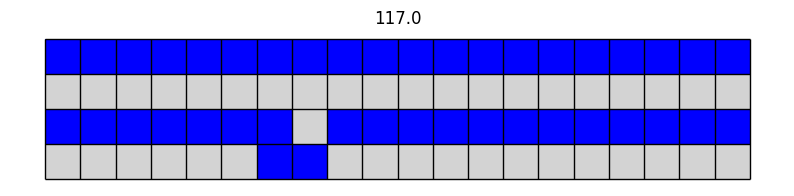

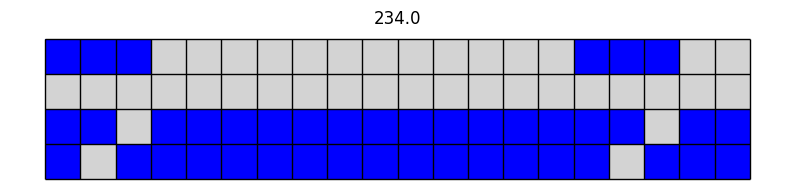

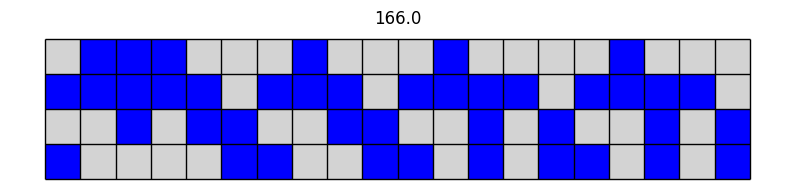

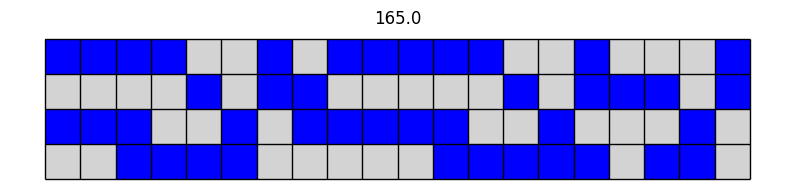

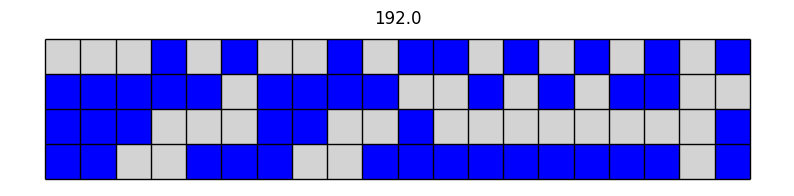

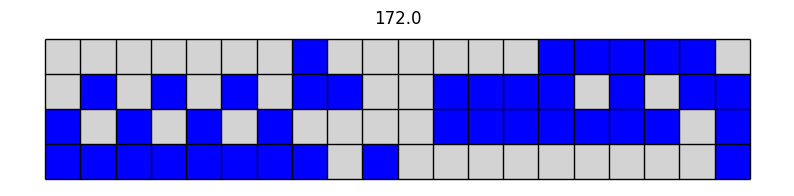

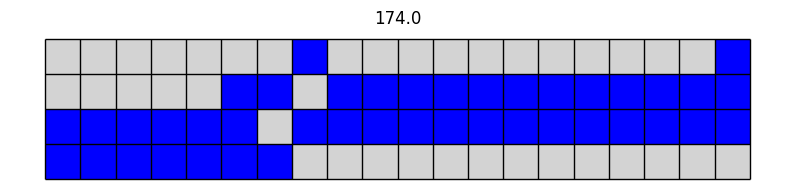

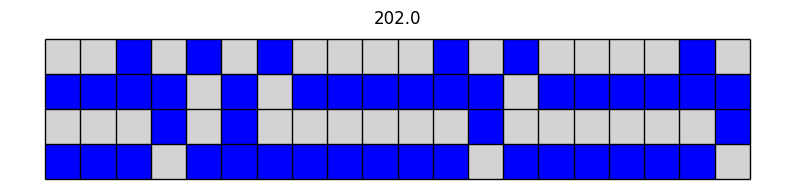

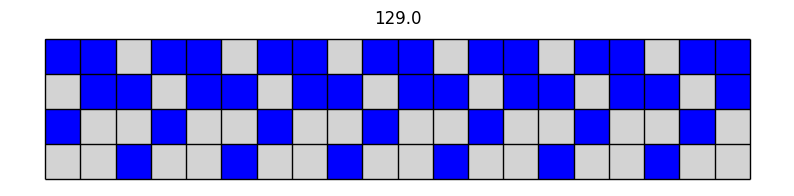

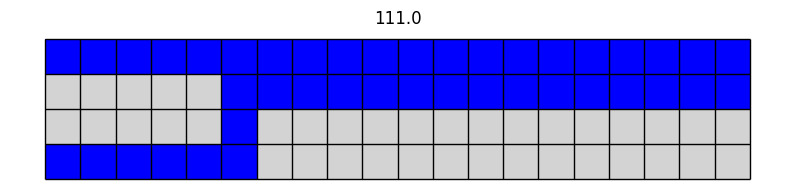

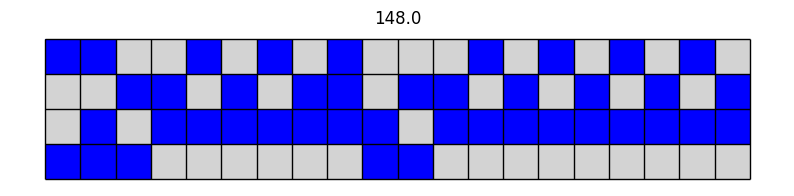

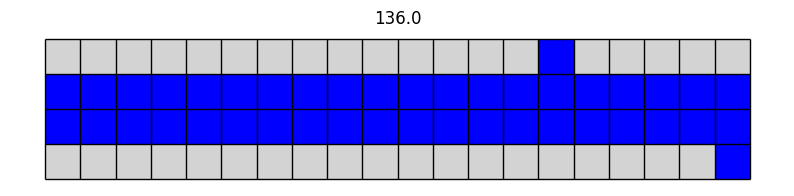

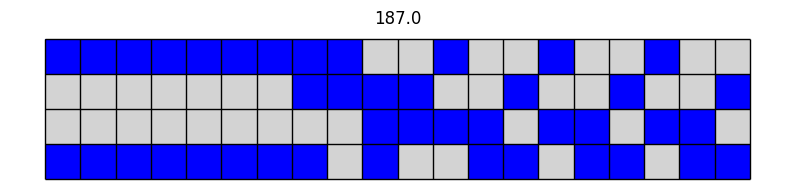

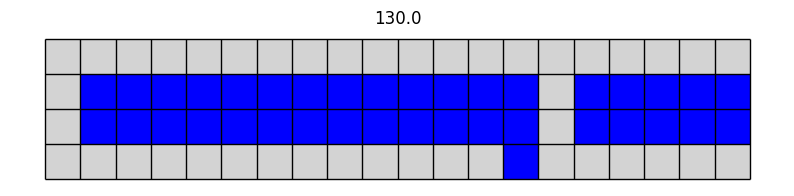

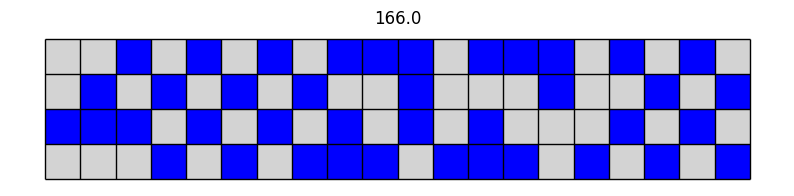

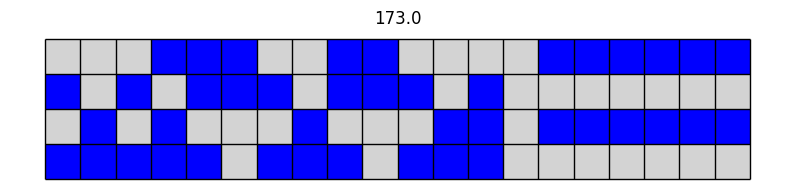

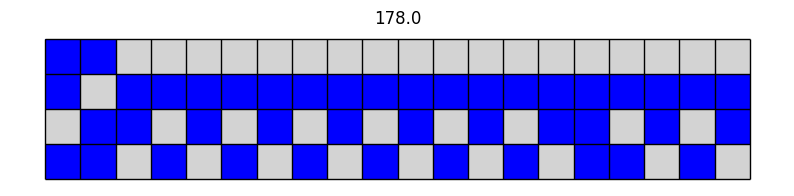

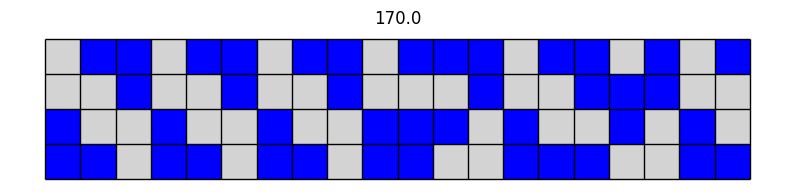

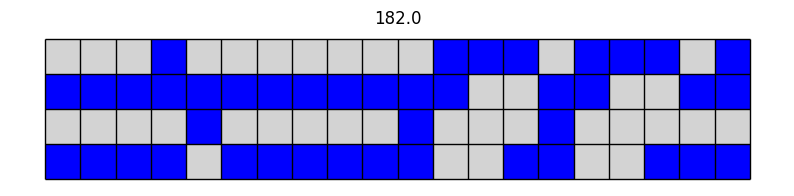

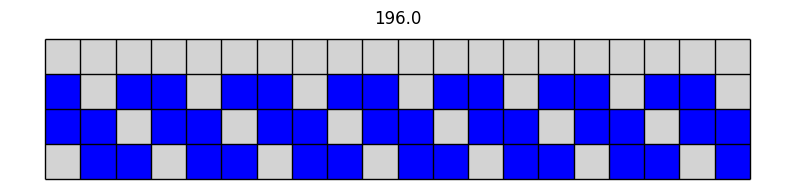

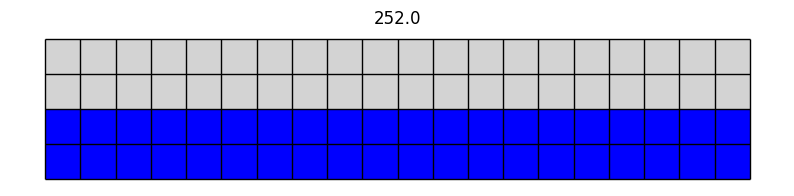

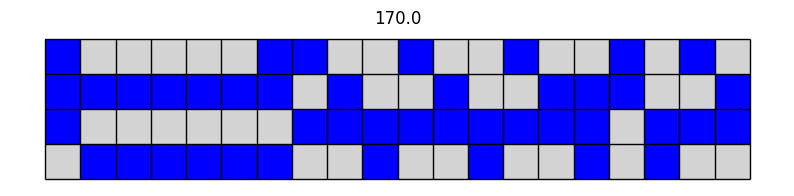

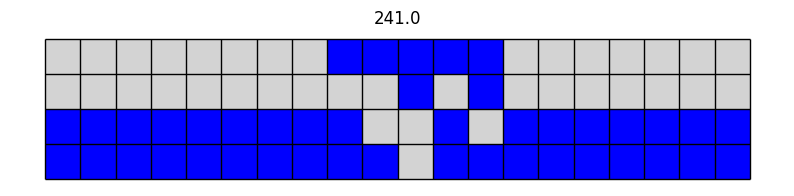

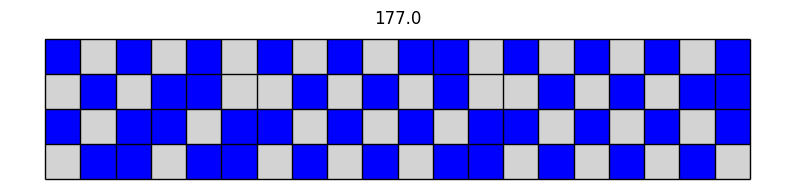

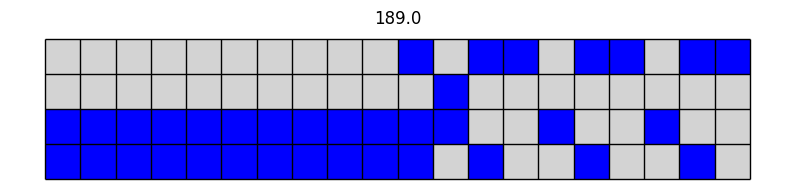

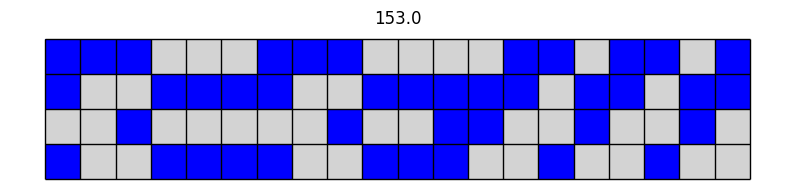

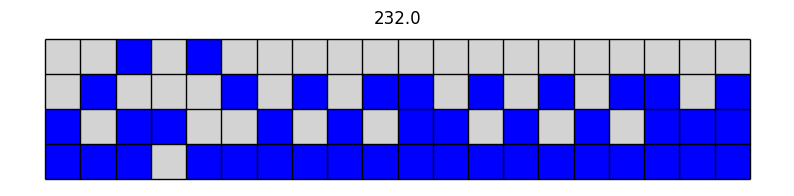

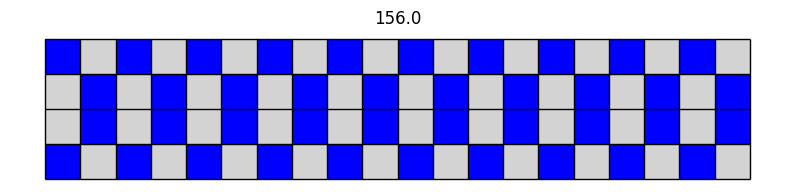

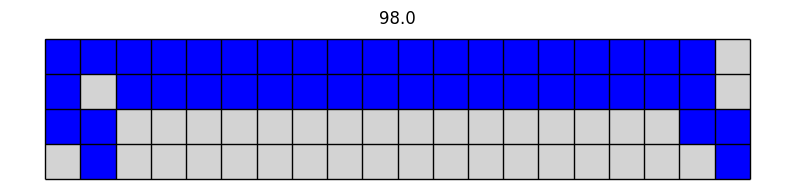

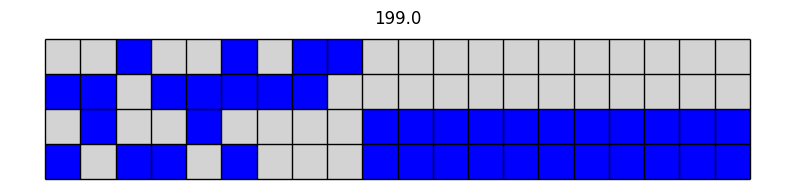

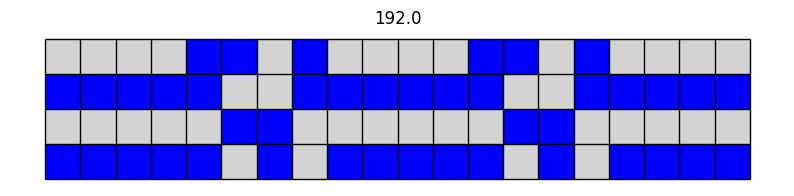

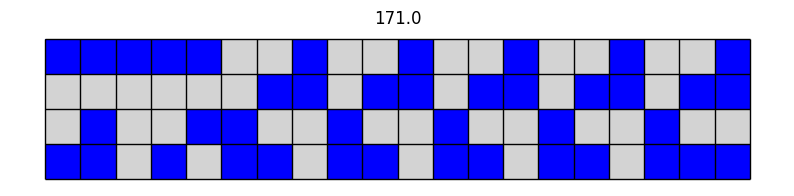

In [5]:
T = 20
M = df['round'].max()
data = df[df['round'] >= M - T]
columns = ['id_sim']
num_sims = len(data['id_sim'].unique())
fourier = list()
for key, grp in data.groupby(columns):
    attendance = Fourier.get_round_attendance(grp)
    states = Fourier.get_states(attendance)
    f_max = Fourier.get_fourier_max(states)
    fourier.append(f_max)
    # print('\n' + '-'*50)
    # print(f_max, '////', Fourier.get_group_max_fourier(grp))
    bar = BarRenderer(grp, data_folder)
    bar.render_threshold(title=f_max, num_rounds=T)

